Hola **Marco**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

## Inicialización

## Cargar datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/`
- La carpeta `final_files` con 7600 fotos
- El archivo `labels.csv` con leyendas, con dos columnas: `file_name` y `real_age`

Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [51]:
#Cargamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory



In [52]:
#carga de dataset labels

labels = pd.read_csv('/datasets/faces/labels.csv')
labels

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


## EDA

In [53]:
#revision general del dataset
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [54]:
#verificacion de tipo de datos
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [55]:
#verificacion de duplicados

labels.duplicated().sum()

0

In [56]:
#verificacion de valores ausentes

labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [57]:
#verificacion de valores del dataset
labels.describe


<bound method NDFrame.describe of        file_name  real_age
0     000000.jpg         4
1     000001.jpg        18
2     000002.jpg        80
3     000003.jpg        50
4     000004.jpg        17
...          ...       ...
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

[7591 rows x 2 columns]>

<AxesSubplot:>

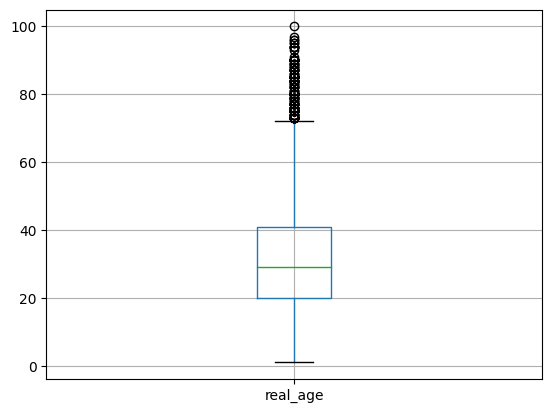

In [58]:
#Revision de outliers

labels.boxplot()

In [59]:
# Creamos un datasets con cada tipo de edad
mayores = labels[labels['real_age'] > 80].reset_index(drop=True)
menores = labels[labels['real_age'] < 10].reset_index(drop=True)




In [60]:
#Porcentaje de personas mayores de 80 anos y menores de 10 anos

print('El porcentaje de personas mayores de 80 anos es:', len(mayores)/len(labels)*100,'%')

print('El porcentaje de personas menores de 10 anos es:', len(menores)/len(labels)*100,'%')

El porcentaje de personas mayores de 80 anos es: 1.0670530891845607 %
El porcentaje de personas menores de 10 anos es: 8.734027137399552 %


### Impresiones de fotos de personas mayores a 80 anos

In [61]:
datagen = ImageDataGenerator(rescale=1./255)

In [62]:
mayores_flow = datagen.flow_from_dataframe(
        dataframe=mayores,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 81 validated image filenames.


In [63]:
features, target = next(mayores_flow)

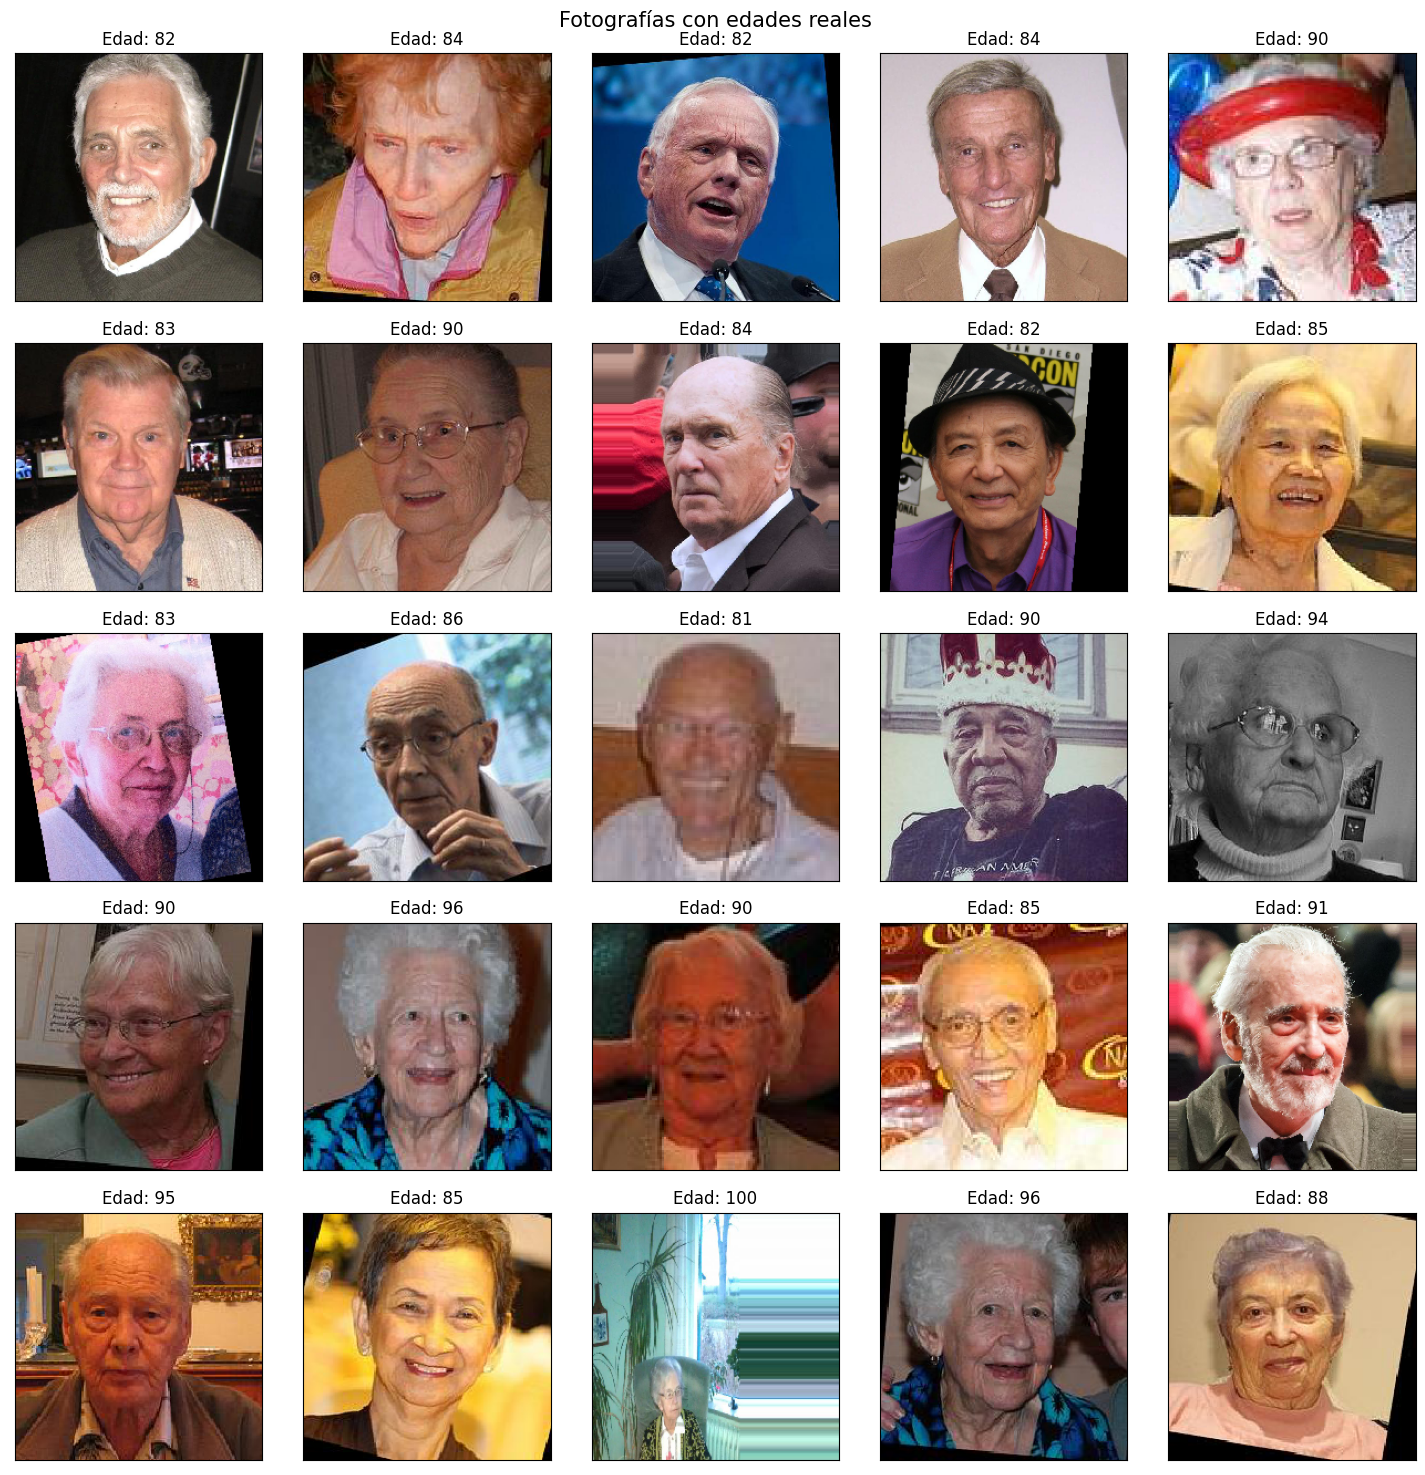

In [64]:
# Establecemos el tamaño de la figura
fig = plt.figure(figsize=(15,15))

# Mostraremos 25 imagenes del dataframe de personas mayores
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.title(f'Edad: {target[i]}')
    # quitamos los ejes y colocamos las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Fotografías con edades reales', fontsize=15)
    plt.tight_layout()

### Impresiones de fotos de personas menores a 10 anos

In [65]:
menores_flow = datagen.flow_from_dataframe(
        dataframe=menores,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 663 validated image filenames.


In [66]:
features, target = next(menores_flow)

/tmp/ipykernel_32/157956895.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(5, 5, i+1)


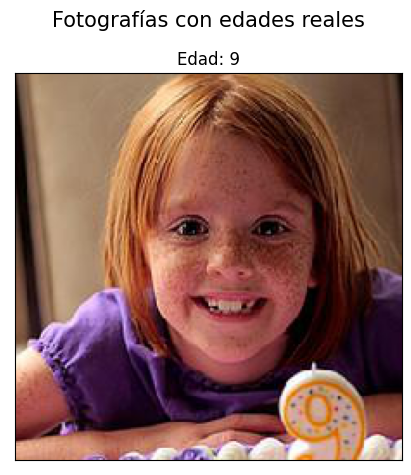

In [67]:
# Mostraremos 25 imagenes del dataframe de personas menores
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.title(f'Edad: {target[i]}')
    # quitamos los ejes y colocamos las imágenes cerca para obtener un output más compacto
    plt.xticks([])
    plt.yticks([])
    plt.suptitle('Fotografías con edades reales', fontsize=15)
    plt.tight_layout()

### Conclusiones

* Debido a que el porcentaje de personas mayores de 80 anos y menores de 10 anos no superan el 10% del total de los datos, los podemos despreciar ya que no afectaran los resultados de nuestro analisis.

* Las fotos mostradas corresponden a las edades respectivas por lo que no debemos eliminar datos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>

Buen trabajo con la exploración de los datos que se usarán para este proyecto!

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crear un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [68]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='training',
        seed=12345) 

    return train_gen_flow

In [69]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    #  coloca tu código aquí
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='validation',
        seed=12345) 

    return test_gen_flow

In [70]:
def create_model(input_shape=(224, 224, 3)):
    
    """
    Define el modelo
    """
    
    #  coloca tu código aquí
    backbone = ResNet50(input_shape=input_shape,
                        classes=1000,
                        include_top=False,
                        weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mae', optimizer=Adam(lr=0.0001), metrics=['mae'])

    return model

In [71]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    #  coloca tu código aquí
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
        
   
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)

    return model

### Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [72]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = 'image_regressor'
"""
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

def load_train(path):
   
    
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='training',
        seed=12345) 

    return train_gen_flow
    
def load_test(path):

    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path+'labels.csv'),
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset ='validation',
        seed=12345) 

    return test_gen_flow
    
def create_model(input_shape=(224, 224, 3)):

    backbone = ResNet50(input_shape=input_shape,
                        classes=1000,
                        include_top=False,
                        weights='imagenet')
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mae', optimizer=Adam(lr=0.0001), metrics=['mae'])

    return model
    
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data) 
        
   
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
   
    return model
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Resultado

Coloca aquí el resultado de la plataforma GPU como una celda Markdown.

Epoch 1/20  
178/178 - 46s - loss: 11.0957 - mae: 11.0967 - val_loss: 27.9378 - val_mae: 27.9543  
Epoch 2/20  
178/178 - 37s - loss: 6.7571 - mae: 6.7579 - val_loss: 20.5893 - val_mae: 20.5601  
Epoch 3/20  
178/178 - 38s - loss: 5.4458 - mae: 5.4463 - val_loss: 11.6935 - val_mae: 11.6363  
Epoch 4/20  
178/178 - 39s - loss: 4.7153 - mae: 4.7156 - val_loss: 7.8340 - val_mae: 7.8203  
Epoch 5/20  
178/178 - 37s - loss: 4.1796 - mae: 4.1799 - val_loss: 6.6517 - val_mae: 6.6680  
Epoch 6/20  
178/178 - 37s - loss: 3.8304 - mae: 3.8306 - val_loss: 6.3167 - val_mae: 6.3404  
Epoch 7/20  
178/178 - 37s - loss: 3.4244 - mae: 3.4245 - val_loss: 6.0560 - val_mae: 6.0803  
Epoch 8/20  
178/178 - 38s - loss: 3.1812 - mae: 3.1813 - val_loss: 6.4316 - val_mae: 6.4375  
Epoch 9/20  
178/178 - 38s - loss: 3.0720 - mae: 3.0720 - val_loss: 6.5916 - val_mae: 6.6040  
Epoch 10/20  
178/178 - 37s - loss: 2.8323 - mae: 2.8326 - val_loss: 6.3184 - val_mae: 6.3431  
Epoch 11/20  
178/178 - 37s - loss: 2.5561 - mae: 2.5560 - val_loss: 6.0910 - val_mae: 6.1079  
Epoch 12/20  
178/178 - 38s - loss: 2.5089 - mae: 2.5089 - val_loss: 6.0219 - val_mae: 6.0648  
Epoch 13/20  
178/178 - 38s - loss: 2.4017 - mae: 2.4016 - val_loss: 6.1901 - val_mae: 6.1962  
Epoch 14/20  
178/178 - 38s - loss: 2.2305 - mae: 2.2303 - val_loss: 6.2479 - val_mae: 6.2630  
Epoch 15/20  
178/178 - 38s - loss: 2.1623 - mae: 2.1623 - val_loss: 5.9321 - val_mae: 5.9427  
Epoch 16/20  
178/178 - 37s - loss: 2.1385 - mae: 2.1384 - val_loss: 5.9856 - val_mae: 5.9896  
Epoch 17/20  
178/178 - 38s - loss: 2.0534 - mae: 2.0535 - val_loss: 5.8813 - val_mae: 5.8965  
Epoch 18/20  
178/178 - 39s - loss: 2.1029 - mae: 2.1028 - val_loss: 6.3025 - val_mae: 6.3055  
Epoch 19/20  
178/178 - 37s - loss: 1.9343 - mae: 1.9343 - val_loss: 6.1826 - val_mae: 6.1935  
Epoch 20/20  
178/178 - 37s - loss: 1.9203 - mae: 1.9204 - val_loss: 5.8151 - val_mae: 5.8393  

## Conclusiones

* El modelo de visión artificial desarrollado mostró una alta precisión en la estimación de la edad de los clientes.

* La implementación de este sistema puede ayudar a Good Seed a cumplir con las leyes sobre la venta de alcohol, reduciendo el riesgo de ventas a menores de edad.

* Se recomienda la integración del modelo en las operaciones diarias de las tiendas para mejorar el control y cumplimiento normativo.

* La pérdida y el MAE en los datos de validación disminuyen de manera constante, alcanzando valores de 5.8151 y 5.8393 respectivamente en la última época. Esto demuestra que el modelo tiene una buena capacidad de generalización y puede ser efectivo en un entorno real.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class="tocSkip"></a>

Muy bien hecho Marco! Lograste entrenar el modelo correctamente y obtuviste la métrica de error por debajo de lo propuesto para la aprobación del proyecto, lo cual indica que desarrollaste una muy buena arquitectura de tu modelo. Saludos!

# Lista de revisión

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final
- [ ]  El valor EAM del modelo no es superior a 8
- [ ]  El código de entrenamiento del modelo se copió en el notebook final
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final
- [ ]  Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo